# Oil production

## Used libraries

In [2]:
# DATA MANIPULATION, Visualization, and stats
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import os

ModuleNotFoundError: No module named 'statsmodels'

## Upload the data

In [1]:
path = 'data' # use your path
all_files = glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df

NameError: name 'glob' is not defined

## To Datetime format

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

datetime64[ns, pytz.FixedOffset(60)]

## Explore the dataset

In [6]:
df.shape

(5813, 189)

In [7]:
df.describe()

,Calculated Drawdown_At Gauge,Calculated Drawdown_At Bottom Node,Reservoir Pressure,z Well Identifier,z TMore PS Identifier,z TMore Identifier,z Tag Identifier 2,z Tag Identifier,z PI-AF Database,z PDMS Site Identifier,...,Annulus Master Valve Status,Annulus Master Valve Opening Frequency,Pseudo Cv,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL Ramp-up Speed,GL WCT
count,386.000000,384.000000,5.813000e+03,5813.0,0.0,0.0,5813.0,5813.0,0.0,0.0,...,0.0,2921.000000,693.000000,5813.0,5813.0,5813.0,5813.0,5813.0,0.0,5.813000e+03
mean,34.614258,33.338302,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,98.218326,0.507781,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01
std,4.416955,4.688350,2.842415e-14,0.0,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,11.874425,0.124311,0.0,0.0,0.0,0.0,0.0,NaN,1.421208e-14
min,3.175037,0.000000,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,0.000000,0.000000,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01
25%,34.207722,33.373866,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,100.000000,0.421615,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01
50%,35.558132,34.099007,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,100.000000,0.515856,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01
75%,36.106556,34.566325,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,100.000000,0.565282,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01
max,38.203556,37.937714,1.863400e+02,30221.0,NaN,NaN,1.0,3022.0,NaN,NaN,...,NaN,100.000000,1.273692,52.5,90.0,32300.0,10960.0,21360.0,NaN,6.608000e+01


In [8]:
df.duplicated().sum()

0

### Dealing with missing data

#### Check only NaN features

In [1]:
sorted_nan = df.isnull().sum().sort_values(ascending=False) 
sorted_nan.type

NameError: name 'df' is not defined

In [10]:
n = 0
f = 0
features_drop = []
for feature, value in dict(sorted_nan).items():
    if value == len(df):
        n += 1
        features_drop.append(feature)
    if value == 0:
        f += 1
        
print(f'there are {n} features with only NaN values')
print('--------------------------------------------')
print(f'there are {f} features with no NaN values')
print('--------------------------------------------')
print(f'there are {df.shape[1] - n - f} features with some NaN values')

there are 58 features with only NaN values
--------------------------------------------
there are 32 features with no NaN values
--------------------------------------------
there are 99 features with some NaN values


#### Check which features have values and NaN:

In [11]:
dic = {}
for feature, value in dict(sorted_nan).items():
    if value < len(df) and value > 0:
        dic[feature] = value
        
dic

{'Test MPFM CF Oil': 5686,
 'Test WHT': 5686,
 'PC Coefficient A3': 5686,
 'Productivity Index': 5686,
 'PC Coefficient A4': 5686,
 'Test WCT': 5686,
 'PC Coefficient A2': 5686,
 'PC Coefficient A1': 5686,
 'PC Coefficient A0': 5686,
 'Bottomhole Drawdown': 5686,
 'Last Validated Test Duration': 5686,
 'Test WHP': 5686,
 'Test MPFM CF Wat': 5686,
 'Test MPFM CF WCT': 5686,
 'Test Qoil Vol': 5686,
 'Reservoir P': 5686,
 'Test Productivity Index': 5686,
 'Test Qwat': 5686,
 'Test Qoil': 5686,
 'Test GOR': 5686,
 'Test Qliq Vol': 5686,
 'Test Qliq': 5686,
 'Test Downhole Gauge P': 5686,
 'Test MPFM CF Gas': 5686,
 'Test Choke Outlet P': 5686,
 'Test Qwat Vol': 5686,
 'Test Choke Opening': 5686,
 'Test MPFM CF GOR': 5686,
 'Test Qgas Vol': 5686,
 'Test MPFM CF Liq': 5686,
 'Test Reservoir P': 5686,
 'Test Qgas': 5686,
 'Test Downhole Gauge T': 5686,
 'Qgas IPR': 5511,
 'Bottomhole P': 5511,
 'GOR Model': 5511,
 'Qgas VLP': 5511,
 'WCT Model': 5511,
 'C Factor Well': 5511,
 'Qliq PC': 5471,

#### Check which features with some NaN should be dropped

In [12]:
dic_2 = {}

for feature, value in dic.items():
    dic_2[feature] = round(value/len(df),2) 
    if dic_2[feature] > 0.3:
        features_drop.append(feature)
    

dic_2

{'Test MPFM CF Oil': 0.98,
 'Test WHT': 0.98,
 'PC Coefficient A3': 0.98,
 'Productivity Index': 0.98,
 'PC Coefficient A4': 0.98,
 'Test WCT': 0.98,
 'PC Coefficient A2': 0.98,
 'PC Coefficient A1': 0.98,
 'PC Coefficient A0': 0.98,
 'Bottomhole Drawdown': 0.98,
 'Last Validated Test Duration': 0.98,
 'Test WHP': 0.98,
 'Test MPFM CF Wat': 0.98,
 'Test MPFM CF WCT': 0.98,
 'Test Qoil Vol': 0.98,
 'Reservoir P': 0.98,
 'Test Productivity Index': 0.98,
 'Test Qwat': 0.98,
 'Test Qoil': 0.98,
 'Test GOR': 0.98,
 'Test Qliq Vol': 0.98,
 'Test Qliq': 0.98,
 'Test Downhole Gauge P': 0.98,
 'Test MPFM CF Gas': 0.98,
 'Test Choke Outlet P': 0.98,
 'Test Qwat Vol': 0.98,
 'Test Choke Opening': 0.98,
 'Test MPFM CF GOR': 0.98,
 'Test Qgas Vol': 0.98,
 'Test MPFM CF Liq': 0.98,
 'Test Reservoir P': 0.98,
 'Test Qgas': 0.98,
 'Test Downhole Gauge T': 0.98,
 'Qgas IPR': 0.95,
 'Bottomhole P': 0.95,
 'GOR Model': 0.95,
 'Qgas VLP': 0.95,
 'WCT Model': 0.95,
 'C Factor Well': 0.95,
 'Qliq PC': 0.94,

##### Check if there's any feature with NaN ratio between 0.3 and 0.8 we can use

In [13]:
#list of features to check

feat_30_80 = []

for feature, value in dic_2.items():
    if value > 0.3 and value < 0.8:
        feat_30_80.append(feature)

print(len(feat_30_80))
feat_30_80

23


['Ramp-Up Speed',
 'Qoil MAP',
 'WCT',
 'Qwat',
 'Qliq',
 'Qgas',
 'GOR',
 'Control Value',
 'Qoil',
 'Choke dP',
 'Jumper P',
 'Jumper P Availability',
 'Sand Raw Availability',
 'Annulus P Availability',
 'Downhole Gauge P Availability',
 'WHP Availability',
 'DHSV Opening Frequency',
 'Annulus Master Valve Opening Frequency',
 'MPFM Availability',
 'Annulus Wing Valve Opening Frequency',
 'Production Wing Valve Opening Frequency',
 'Production Master Valve Opening Frequency',
 'Choke Opening Availability']

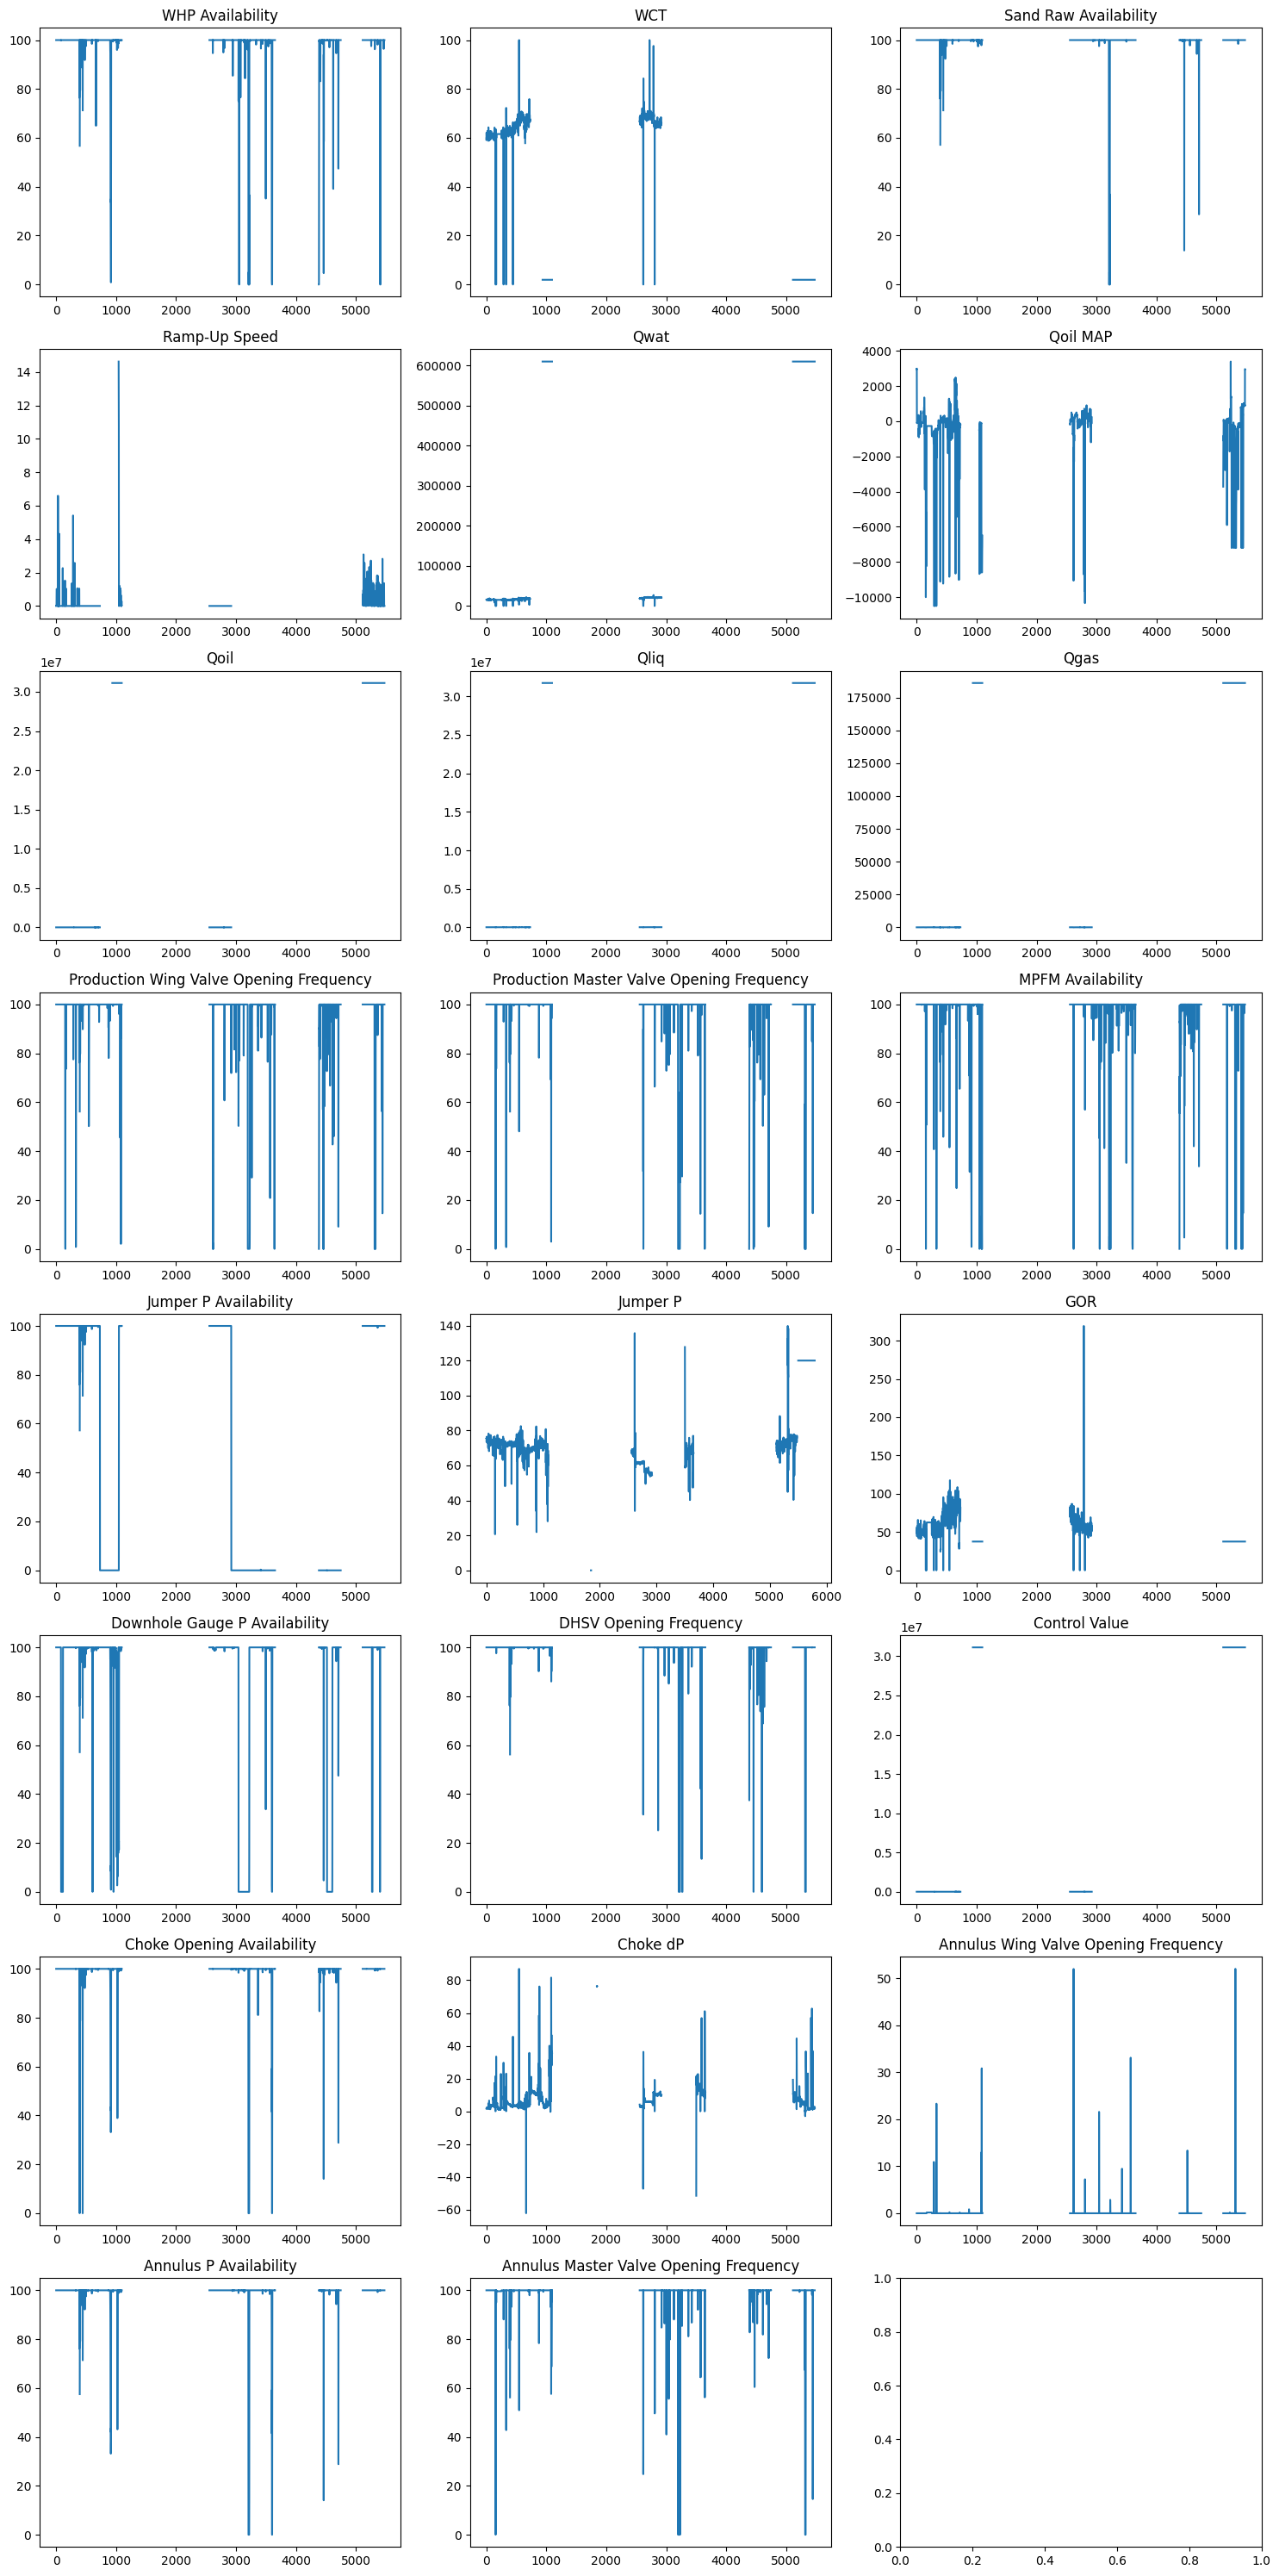

In [14]:
fig, axs = plt.subplots(nrows=8, ncols=3, figsize=(15, 30))

#dataframe with features with NaN ratio between 30% and 80%
df_30_80 = df[df.columns.intersection(feat_30_80)]

for i, col in enumerate(df_30_80.columns):
    row = i // 3
    co = i % 3
    axs[row, co].plot(df[col])
    axs[row, co].set_title(col)

fig.tight_layout()

plt.show()

Apparently no but brainstorm with group and TA

In [15]:
print(f'df should drop {len(features_drop)} features')
print('--------------------------------------------------')
print(f'Total number of features to work with in df: {df.shape[1]-len(features_drop)}')

df should drop 124 features
--------------------------------------------------
Total number of features to work with in df: 65


In [16]:
df.drop(columns=features_drop, inplace = True)

In [17]:
df

,Date,Reservoir Pressure,z Well Identifier,z Tag Identifier 2,z Tag Identifier,WHT,WHP,Well Head Elevation,Water Density,Tubing Gradient,...,Choke Calculated,Bottomhole Reference Depth TVD MSL,Bottomhole Reference Depth MD MSL,Annulus P,GL GOR,GL Qgas,GL Qliq,GL Qoil,GL Qwat,GL WCT
0,2020-01-01 00:00:00+01:00,186.34,30221,1,3022,51.852188,77.289215,1264.6,1.041,0.978534,...,85.922325,2165.7,2454.8,155.356445,52.5,90.0,32300.0,10960.0,21360.0,66.08
1,2020-01-02 00:00:00+01:00,186.34,30221,1,3022,51.858181,77.435455,1264.6,1.041,0.978602,...,85.922325,2165.7,2454.8,155.244370,52.5,90.0,32300.0,10960.0,21360.0,66.08
2,2020-01-03 00:00:00+01:00,186.34,30221,1,3022,51.899837,77.672470,1264.6,1.041,0.978475,...,85.922325,2165.7,2454.8,155.251221,52.5,90.0,32300.0,10960.0,21360.0,66.08
3,2020-01-04 00:00:00+01:00,186.34,30221,1,3022,51.897655,75.517731,1264.6,1.041,0.986171,...,85.922325,2165.7,2454.8,155.104706,52.5,90.0,32300.0,10960.0,21360.0,66.08
4,2020-01-05 00:00:00+01:00,186.34,30221,1,3022,51.920181,77.636574,1264.6,1.041,0.976136,...,85.922325,2165.7,2454.8,155.320740,52.5,90.0,32300.0,10960.0,21360.0,66.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,2007-12-27 00:00:00+01:00,186.34,30221,1,3022,50.884453,NaN,1264.6,1.041,0.000000,...,100.000000,2165.7,2454.8,111.291626,52.5,90.0,32300.0,10960.0,21360.0,66.08
5809,2007-12-28 00:00:00+01:00,186.34,30221,1,3022,50.892269,NaN,1264.6,1.041,0.000000,...,100.000000,2165.7,2454.8,111.363281,52.5,90.0,32300.0,10960.0,21360.0,66.08
5810,2007-12-29 00:00:00+01:00,186.34,30221,1,3022,50.891949,NaN,1264.6,1.041,0.000000,...,100.000000,2165.7,2454.8,111.339233,52.5,90.0,32300.0,10960.0,21360.0,66.08
5811,2007-12-30 00:00:00+01:00,186.34,30221,1,3022,50.900425,NaN,1264.6,1.041,0.000000,...,100.000000,2165.7,2454.8,111.334007,52.5,90.0,32300.0,10960.0,21360.0,66.08


#### Check features with <30% NaN -> SimpleImputer

In [21]:
features_to_impute_check = []

for feature, value in dic_2.items():
    if value < 0.3:
        features_to_impute_check.append(feature)

features_to_impute_check

['Jumper T',
 'Manifold T',
 'MPFM P',
 'WHP',
 'MPFM N81 Count Rate',
 'MPFM Venturi dP',
 'MPFM N356 Count Rate',
 'MPFM N32 Count Rate',
 'MPFM NTotal Count Rate',
 'Qgas MPFM',
 'Downhole Gauge T',
 'MPFM T',
 'Qgas MPFM corrected',
 'MPFM GOR',
 'Downhole Gauge P',
 'Service Line P',
 'Qliq MPFM',
 'Qoil MPFM',
 'Qwat MPFM',
 'WHT',
 'Qliq MPFM corrected',
 'Qoil MPFM corrected',
 'Qwat MPFM corrected',
 'Sand Rate',
 'Sand Raw',
 'Annulus P',
 'Choke Opening',
 'Choke Measured',
 'Choke Calculated',
 'Choke Opening Calc1',
 'Manifold P',
 'Choke CCR',
 'Choke Opening Calc2']

In [22]:
len(features_to_impute_check)

33

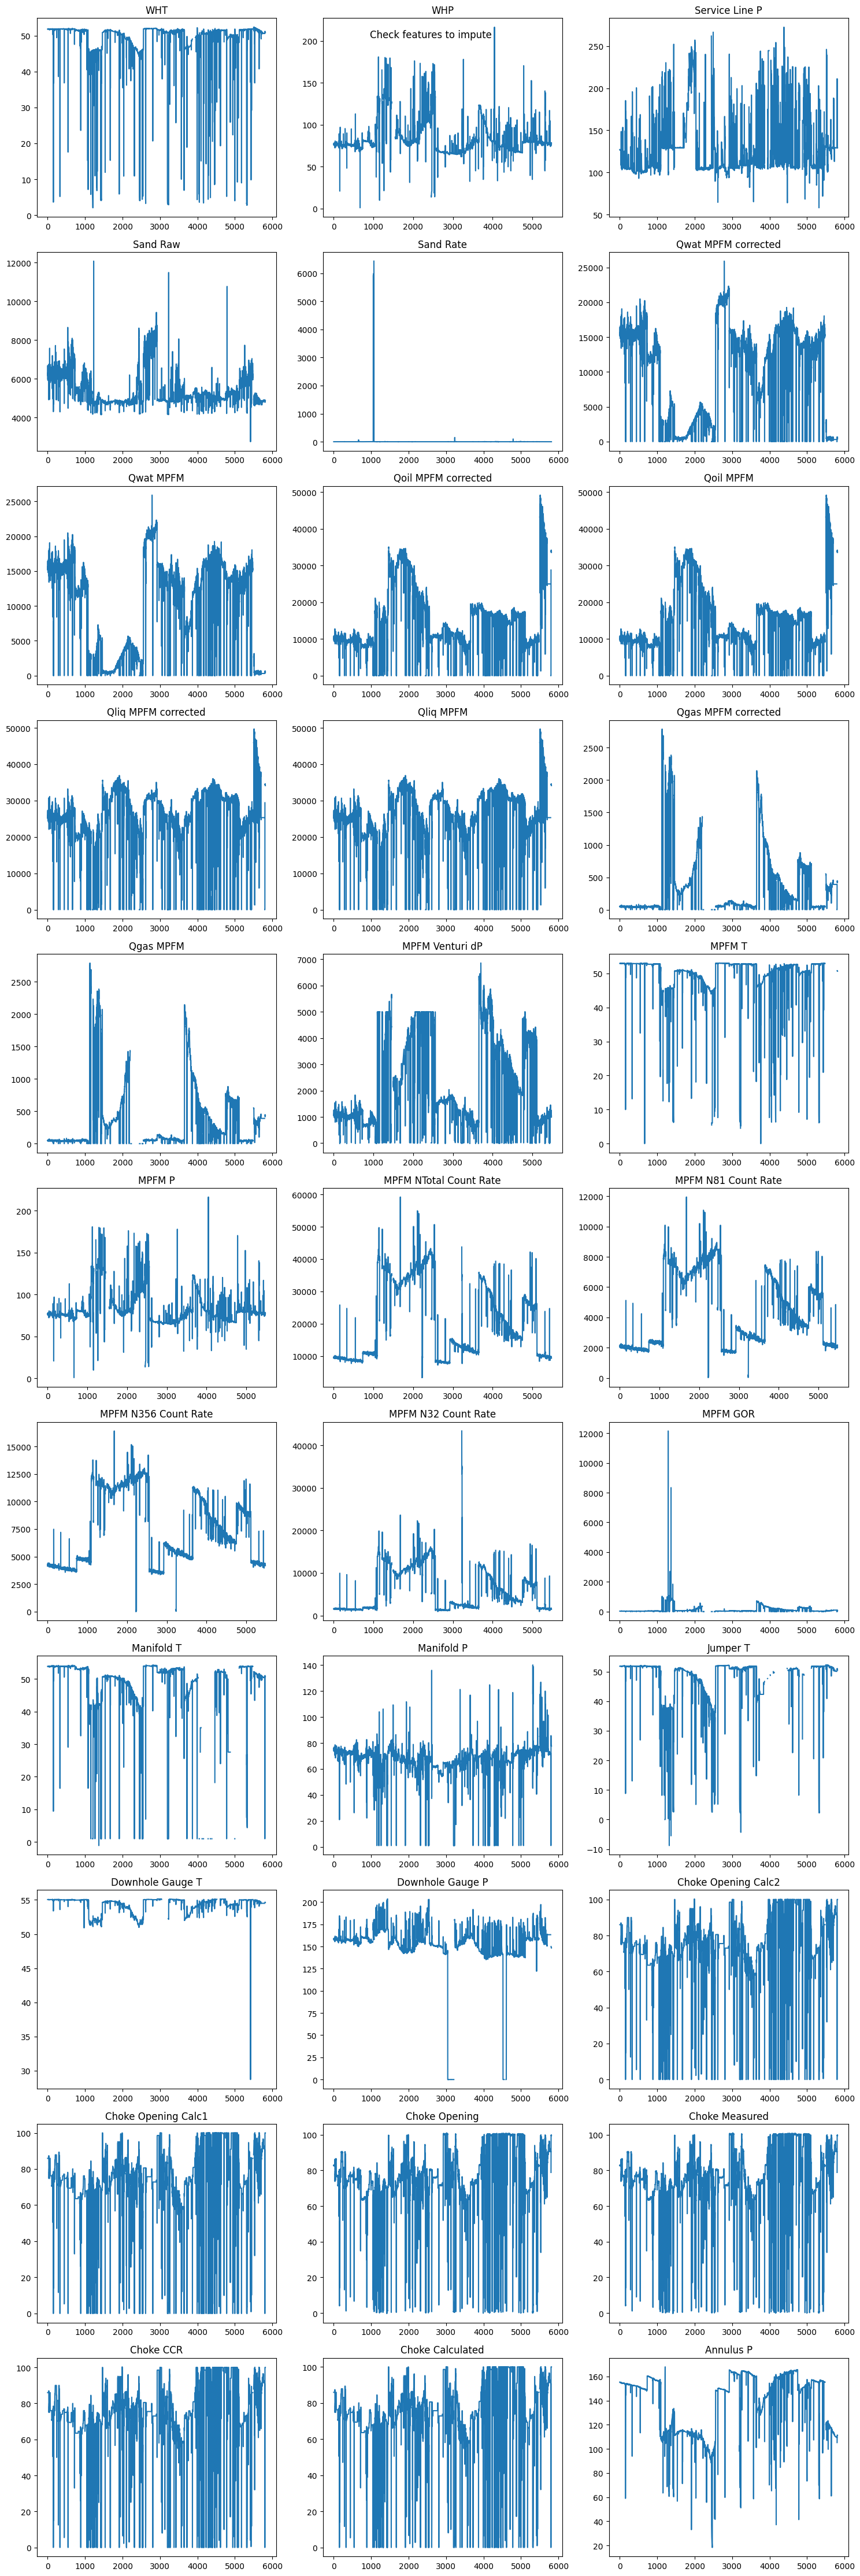

In [24]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 45))

#dataframe with only features to impute
df_to_impute = df[df.columns.intersection(features_to_impute_check)]

for i, col in enumerate(df_to_impute.columns):
    row = i // 3
    co = i % 3
    axs[row, co].plot(df[col])
    axs[row, co].set_title(col)

fig.suptitle('Check features to impute')

fig.tight_layout()

plt.show()

##### Features to be removed after the visual check: 
- Sand Rate
- MPFM NTotal Count Rate
- MPFM N81 Count Rate
- MPFM N356 Count Rate
- MPFM N32 Count Rate
- MPFM GOR
- Dowhole Gauge T
- Dowhole Gauge P

In [29]:
remove = {"Sand Rate", "MPFM NTotal Count Rate", "MPFM N81 Count Rate", "MPFM N356 Count Rate", "MPFM N32 Count Rate", "MPFM GOR", "Downhole Gauge T", "Downhole Gauge P"}
 
features_to_impute = [f for f in features_to_impute_check if f not in remove]
features_to_impute

['Jumper T',
 'Manifold T',
 'MPFM P',
 'WHP',
 'MPFM Venturi dP',
 'Qgas MPFM',
 'MPFM T',
 'Qgas MPFM corrected',
 'Service Line P',
 'Qliq MPFM',
 'Qoil MPFM',
 'Qwat MPFM',
 'WHT',
 'Qliq MPFM corrected',
 'Qoil MPFM corrected',
 'Qwat MPFM corrected',
 'Sand Raw',
 'Annulus P',
 'Choke Opening',
 'Choke Measured',
 'Choke Calculated',
 'Choke Opening Calc1',
 'Manifold P',
 'Choke CCR',
 'Choke Opening Calc2']

In [30]:
len(features_to_impute)

25

#### Imputer... To be continued

#### Choosing the Target

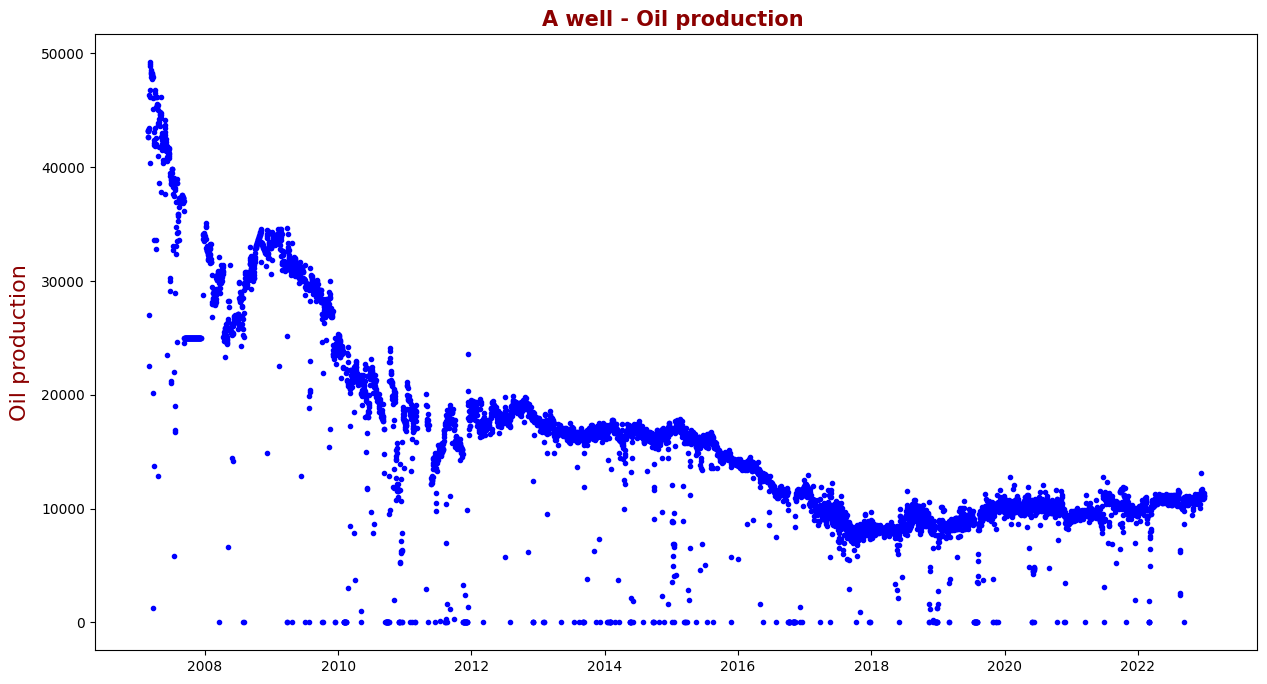

In [62]:
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Qoil MPFM'], **{'color': 'blue', 'linestyle': '','marker': 'o', 'markersize': 3, 'label':'Qoil MPFM'})

plt.title('A well - Oil production ', fontsize=15, color='darkred', weight='bold')
# plt.ylim(top=3000)
plt.ylabel("Oil production", size=16, labelpad=8, color='darkred')
plt.show();

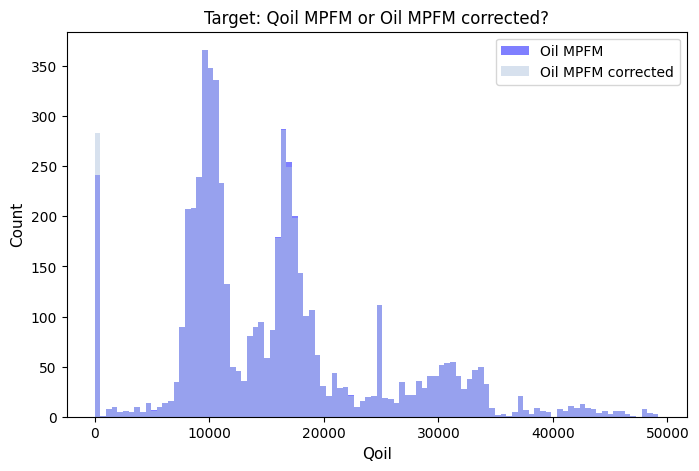

In [66]:
plt.figure(figsize=(8,5))
plt.hist(df['Qoil MPFM'], bins = 100, alpha = 0.5, color = 'blue', label = 'Oil MPFM')
plt.hist(df['Qoil MPFM corrected'], bins = 100, alpha = 0.5, color = 'lightsteelblue', label = 'Oil MPFM corrected')
plt.xlabel("Qoil", size=11)
plt.ylabel("Count", size=11)
plt.title("Target: Qoil MPFM or Oil MPFM corrected?")
plt.legend(loc='upper right')
plt.show();

-->Seems no difference which of the 'Qoil's to use as a *Target*

#### Check for outliers

In [71]:
df_to_impute = df[df.columns.intersection(features_to_impute)]
df_to_impute

,WHT,WHP,Service Line P,Sand Raw,Qwat MPFM corrected,Qwat MPFM,Qoil MPFM corrected,Qoil MPFM,Qliq MPFM corrected,Qliq MPFM,...,Manifold T,Manifold P,Jumper T,Choke Opening Calc2,Choke Opening Calc1,Choke Opening,Choke Measured,Choke CCR,Choke Calculated,Annulus P
0,51.852188,77.289215,127.207451,6171.768555,15635.783547,15635.783547,9613.636011,9613.636011,25249.419558,25249.419558,...,53.819054,75.864853,51.821255,86.0,85.922325,82.869965,82.869965,86.0,85.922325,155.356445
1,51.858181,77.435455,127.002754,6203.603027,15361.815145,15361.815145,10571.676616,10571.676616,25933.491761,25933.491761,...,53.819172,75.838669,51.839058,86.0,85.922325,83.010124,83.010124,86.0,85.922325,155.244370
2,51.899837,77.672470,126.769638,6241.667480,15195.819652,15195.819652,10196.247010,10196.247010,25392.066662,25392.066662,...,53.856018,76.131828,51.839710,86.0,85.922325,82.547585,82.547585,86.0,85.922325,155.251221
3,51.897655,75.517731,126.803810,6678.920410,16459.812485,16459.812485,10859.098011,10859.098011,27318.910496,27318.910496,...,53.850723,73.671616,51.867786,86.0,85.922325,82.927780,82.927780,86.0,85.922325,155.104706
4,51.920181,77.636574,126.738411,5948.057617,15390.935848,15390.935848,9928.274351,9928.274351,25319.210199,25319.210199,...,53.843445,76.101379,51.851608,86.0,85.922325,82.877502,82.877502,86.0,85.922325,155.320740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5808,50.884453,NaN,129.336456,4810.396484,386.014726,386.014726,34160.806106,34160.806106,34546.820831,34546.820831,...,50.671516,77.587044,50.519409,100.0,100.000000,99.383362,99.383362,100.0,100.000000,111.291626
5809,50.892269,NaN,129.335587,4871.255859,472.748223,472.748223,34011.469935,34011.469935,34484.218158,34484.218158,...,50.673859,77.571144,50.517246,100.0,100.000000,99.601242,99.601242,100.0,100.000000,111.363281
5810,50.891949,NaN,129.296555,4849.200195,390.540434,390.540434,33889.974931,33889.974931,34280.515365,34280.515365,...,50.668304,77.762695,50.517654,100.0,100.000000,99.819839,99.819839,100.0,100.000000,111.339233
5811,50.900425,NaN,129.133133,4847.958496,668.511601,668.511601,33546.563701,33546.563701,34215.075302,34215.075302,...,50.686947,77.701469,50.527946,100.0,100.000000,99.797363,99.797363,100.0,100.000000,111.334007


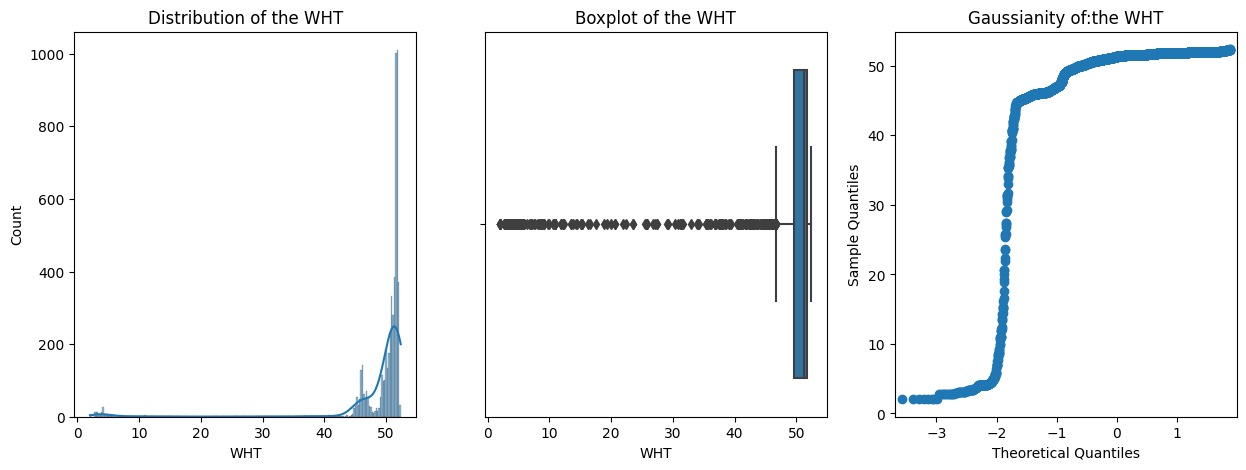

In [74]:
variable = 'WHT'

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df_to_impute, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df_to_impute, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df_to_impute[f"{variable}"],line='s',ax=ax[2]);

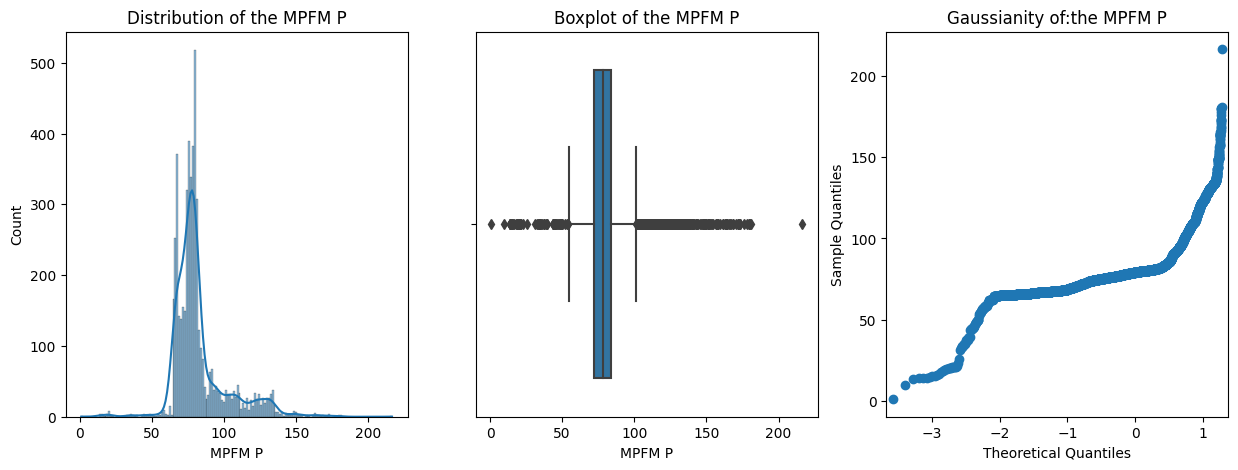

In [75]:
variable = 'MPFM P'

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df_to_impute, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df_to_impute, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df_to_impute[f"{variable}"],line='s',ax=ax[2]);

#### Scaler... to be continued